<a href="https://colab.research.google.com/github/benku123/Statistics_Python/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [ ]:
x = np.array([4.51, 3.58, 4.31, 5.06, 5.64, 4.99, 5.29, 5.83, 4.7, 5.61, 4.9, 4.2])
y = np.array([2.4, 2.26, 2.47, 2.77, 2.99, 3.05, 3.18, 3.46, 3.05, 3.26, 2.67, 2.53])

In [ ]:
X = np.array(x).reshape(-1, 1)
Y = np.array(y)

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [ ]:
model.intercept_

0.3776796379533267

In [ ]:
df = pd.read_csv('/content/sample_data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [ ]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['SqFt']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(predictions)

[109451.07078841  97605.44963186 124258.0972341  124998.44855638
 134623.01574608 144247.58293577 136103.71839065 123517.74591181
 140545.82632435 130180.90781237 141286.17764664 107970.36814384
 119815.98930039 139805.47500207 162756.36599289 130180.90781237
 121296.69194496 144247.58293577 135363.36706836  94644.04434272
 107970.36814384 132401.96177922 126479.15120095 120556.34062267
 169419.52789345 116114.23268897]


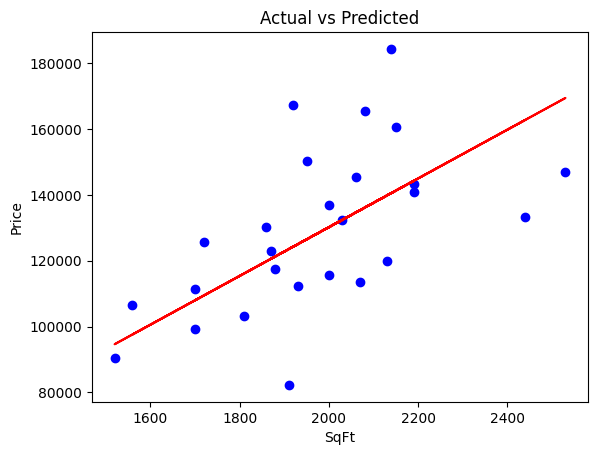

In [ ]:
import matplotlib.pyplot as plt

# Predictions
predictions = model.predict(X_test)

# Plotting
plt.scatter(X_test, y_test, color = 'blue')  # Actual
plt.plot(X_test, predictions, color = 'red')  # Predicted
plt.title('Actual vs Predicted')
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.show()


In [ ]:
y_pred = model.predict(X)

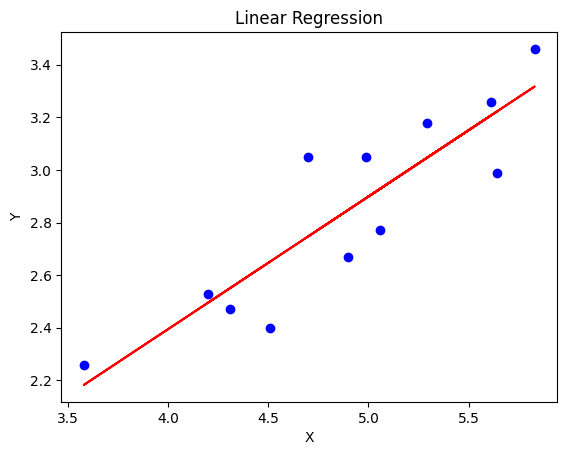

In [ ]:
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.show()

In [ ]:
sse = np.sum((y_pred - Y)**2)
mse = mean_squared_error(Y, y_pred)
sst = np.sum((Y - np.mean(Y))**2)

print(f'SSE: {sse}')
print(f'MSE: {mse}')
print(f'SST: {sst}')

SSE: 0.34512957022350776
MSE: 0.028760797518625647
SST: 1.5838916666666667


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([12, 14, 16, 18, 20, 22, 25, 25, 28, 30])
y = np.array([44, 42, 36, 38, 37, 32, 30, 26, 28, 25])

w = 50
b = 0
n = len(x)

alpha_a = 0.002 #learning rate
alpha_b = 0.1 #learning rate

def loss():
 eq = 1 / (2 * n)
 summation = 0
 for i in range(n):
  summation += ((b + (w * x[i]) - y[i])**2)
 return summation * eq


def derivative_J_A():
 division = alpha_a / n
 summation = 0
 for i in range(n):
  summation += (b + (w * x[i]) - y[i])*x[i]
 return summation * division

def derivative_J_B():
 division = alpha_b / n
 summation = 0
 for i in range(n):
  summation += (b + (w * x[i]) - y[i])
 return summation * division

for epoch in range(1001):
 temp1 = b - derivative_J_B()
 temp2 = w - derivative_J_A()
 w = round(temp2, 4)
 b = round(temp1, 4)
 if epoch % 100 == 0:
  print(f"epoch: {epoch} loss: {round(loss(), 4)} parameters: w:{w} and b:{b}")


epoch: 0 loss: 1768.5854 parameters: w:3.9708 and b:-101.62
epoch: 100 loss: 231.8349 parameters: w:2.5888 and b:-25.7008
epoch: 200 loss: 66.678 parameters: w:0.8847 and b:12.4907
epoch: 300 loss: 20.0167 parameters: w:-0.021 and b:32.7906
epoch: 400 loss: 6.8336 parameters: w:-0.5024 and b:43.5801
epoch: 500 loss: 3.1078 parameters: w:-0.7584 and b:49.3165
epoch: 600 loss: 2.0557 parameters: w:-0.8944 and b:52.364
epoch: 700 loss: 1.7581 parameters: w:-0.9667 and b:53.9856
epoch: 800 loss: 1.6741 parameters: w:-1.0052 and b:54.8466
epoch: 900 loss: 1.6504 parameters: w:-1.0256 and b:55.304
epoch: 1000 loss: 1.6436 parameters: w:-1.0365 and b:55.5483
